# Power analysis

In [1]:
import statsmodels.stats.power
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
es = 2
p_005 = []
p_001 = []
p_0001 = []
for i in range(3,11):
    p_005.append(statsmodels.stats.power.tt_ind_solve_power(effect_size=es, nobs1=i, alpha=0.05, 
                                               power=None, ratio=1.0, alternative='two-sided'))
    p_001.append(statsmodels.stats.power.tt_ind_solve_power(effect_size=es, nobs1=i, alpha=0.01, 
                                               power=None, ratio=1.0, alternative='two-sided'))
    p_0001.append(statsmodels.stats.power.tt_ind_solve_power(effect_size=es, nobs1=i, alpha=0.001, 
                                               power=None, ratio=1.0, alternative='two-sided'))
data = pd.DataFrame({'p = 0.05':p_005, 'p = 0.01':p_001,'p = 0.001':p_0001})
data.index = range(3,11)

Text(0, 0.5, 'Power ($\\beta$)')

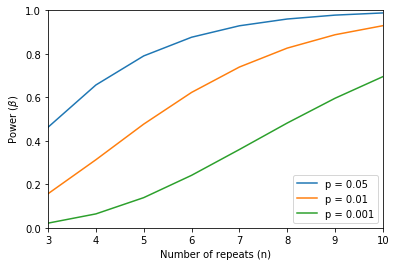

In [3]:
ax = data.plot()
ax.set_xlim(3,10)
ax.set_xlabel('Number of repeats (n)')
ax.set_ylim(0,1)
ax.set_ylabel(r'Power ($\beta$)')

In [19]:
results = []
p = statsmodels.stats.power.FTestAnovaPower()
for i in range(3,16):
    for alpha in [0.05, 0.01, 0.001]:
        for k_groups in [2,3,5]:
            
            power = p.solve_power(effect_size=es, nobs=i, alpha=alpha, 
                                                power=None, k_groups = k_groups)
            result = [i, f'p = {alpha}', k_groups, power]
            results.append(result)

In [20]:
results = np.array(results)
power = np.array(results[:,-1], dtype=float)
power[np.isnan(power)] = 0

results = {'n':np.array(results[:,0],dtype=int), 'p':results[:,1], 'k_groups':results[:,2], 'power':power}


In [21]:
data = pd.DataFrame(results, columns=['n', 'p', 'k_groups', 'power'])

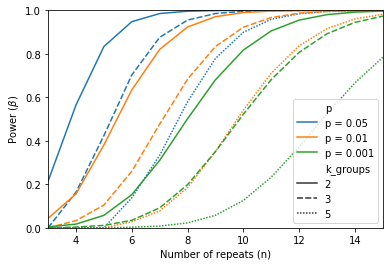

In [24]:
ax = sns.lineplot(x='n', y='power', hue='p', style='k_groups', data=data)
ax.set_xlim(3,15)
ax.set_xlabel('Number of repeats (n)')
ax.set_ylim(0,1)
ax.set_ylabel(r'Power ($\beta$)')

plt.gcf().savefig('anova_power.png', dpi = 600)


In [8]:
data

,n,p,k_groups,power
0,3,p = 0.05,2,0.214261
1,3,p = 0.05,3,0.000000
2,3,p = 0.05,4,0.000000
3,3,p = 0.05,5,0.000000
4,3,p = 0.01,2,0.043411
...,...,...,...,...
91,10,p = 0.01,5,0.541148
92,10,p = 0.001,2,0.817465
93,10,p = 0.001,3,0.522366
94,10,p = 0.001,4,0.276726
